In [1]:
# Import libralies
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import to_rgba


In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

root_path = '/content/drive/MyDrive/Codes/Riemannian-interior-point-trust-region-method'

Mounted at /content/drive


In [3]:
# Set variables
problem_name = "StableIdentification"

solver_name = ["RALM_SteepestDescent", "RSQO_reghess", "RIPM_RepMat", "RIPTRM_Exact_RepMat", "RIPTRM_tCG"]

# solver_name = ["RIPTRM_tCG", "RIPTRM_Exact_RepMat", "RALM_SteepestDescent", "RIPM_RepMat", "RSQO_reghess"]
# solver_name = ["RIPTRM",  "RALM", "RIPM", "RSQO"]

# Paul Tol's color-blind-friendly palette
tol_colors = ["#4477AA", "#66CCEE", "#228833", "#CCBB44", "#EE6677", "#AA3377", "#BBBBBB"]
# tol_colors = ["#4477AA", "#66CCEE", "#228833", "#EE6677", "#AA3377", "#BBBBBB"]

In [4]:
# Preliminaries

def set_display_name(solver_name):
  if solver_name == "RIPTRM_tCG":
    return "RIPTRM (tCG)"
  elif solver_name == "RIPTRM_Exact_RepMat":
    return "RIPTRM (exact)"
  elif solver_name == "RALM_SteepestDescent":
    return "RALM"
  elif solver_name == "RSQO_reghess":
    return "RSQO"
  elif solver_name == "RIPM_RepMat":
    return "RIPM"

def set_xlabel(xaxis_col_name=None):
  if xaxis_col_name == None:
    return "Step"
  elif xaxis_col_name == "time":
    return "Time (sec)"

def set_ylabel(yaxis_col_name, is_y_logscale):
  ylabel = None
  if yaxis_col_name == "residual":
    ylabel = "KKT residual"
  if is_y_logscale:
    ylabel = ylabel + " (log10 scale)"
  return ylabel

def set_color(solver_name):
  tol_colors = ["#4477AA", "#66CCEE", "#228833", "#CCBB44", "#EE6677", "#AA3377", "#BBBBBB"]
  if solver_name == "RIPTRM_tCG":
    return tol_colors[5]
  elif solver_name == "RIPTRM_Exact_RepMat":
    return tol_colors[4]
  elif solver_name == "RALM_SteepestDescent":
    return tol_colors[0]
  elif solver_name == "RSQO_reghess":
    return tol_colors[1]
  elif solver_name == "RIPM_RepMat":
    return tol_colors[2]

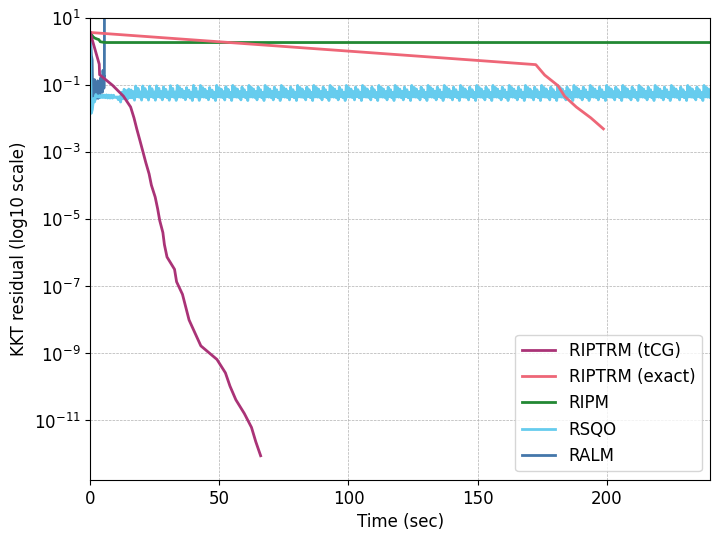

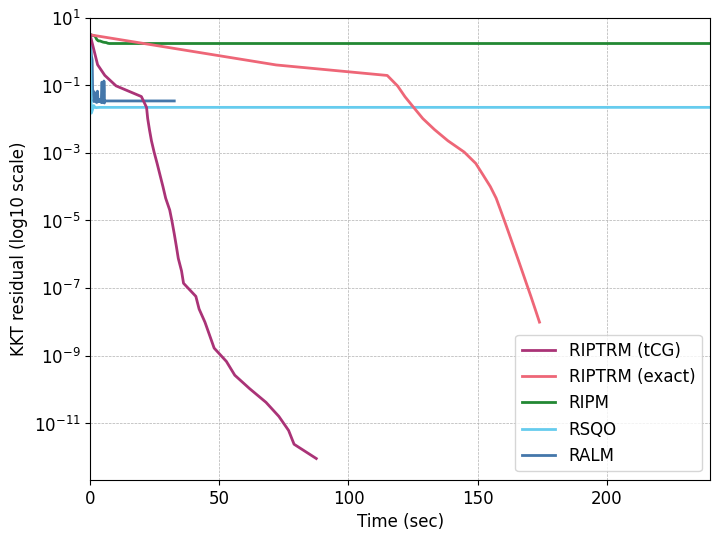

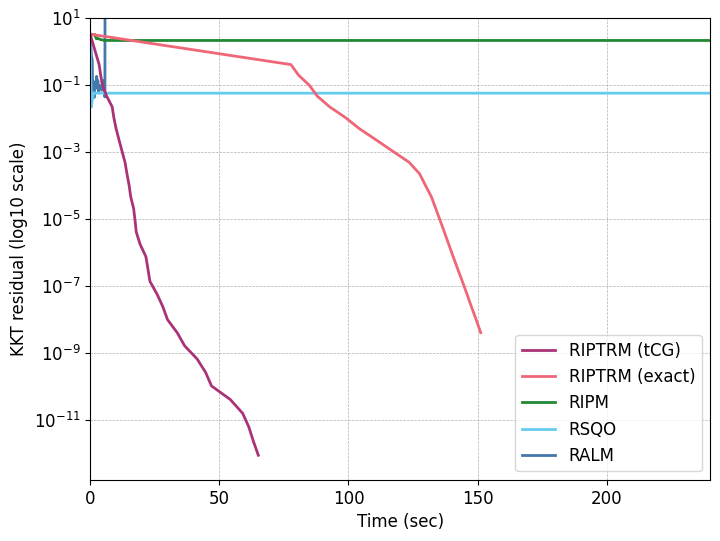

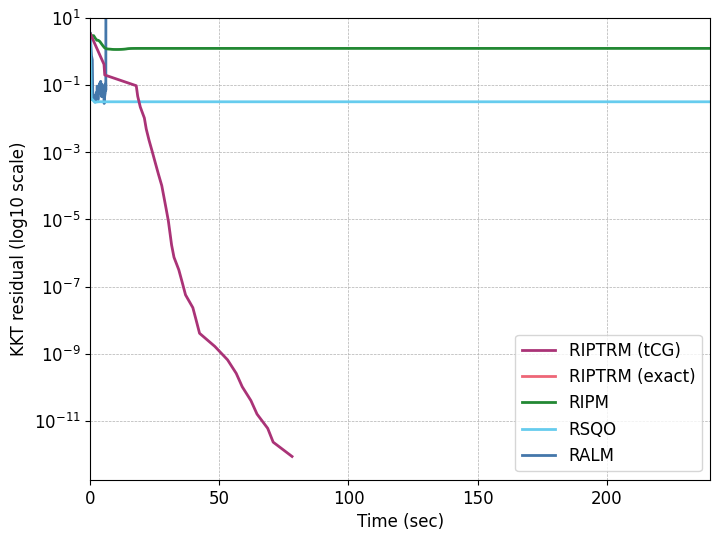

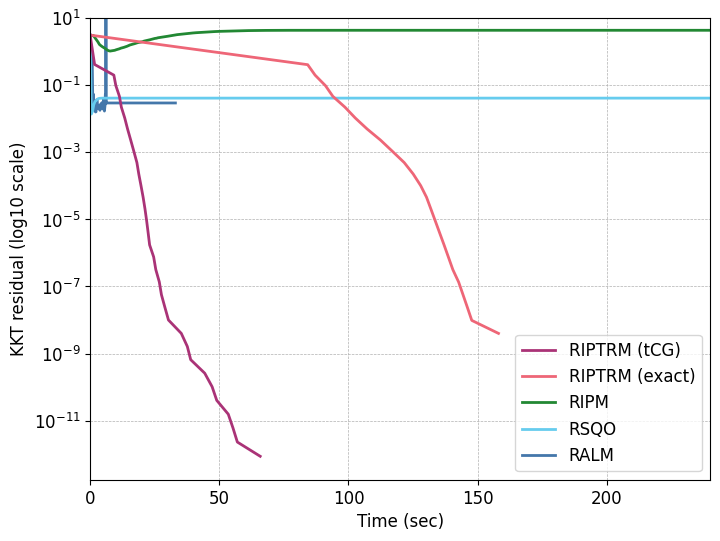

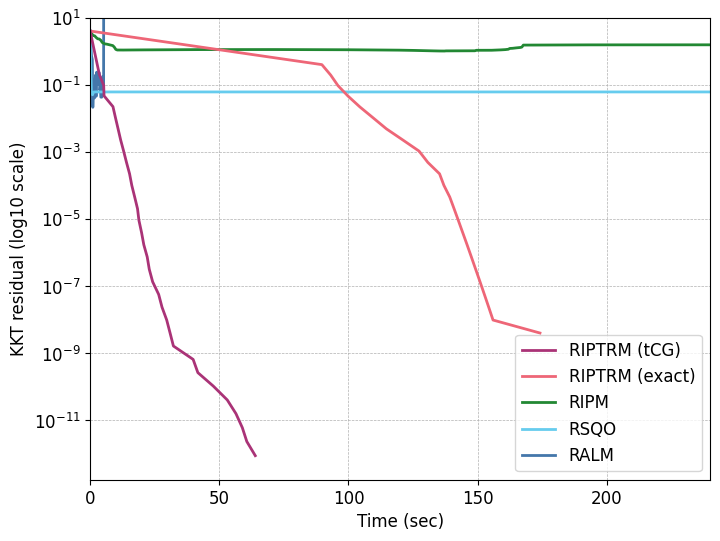

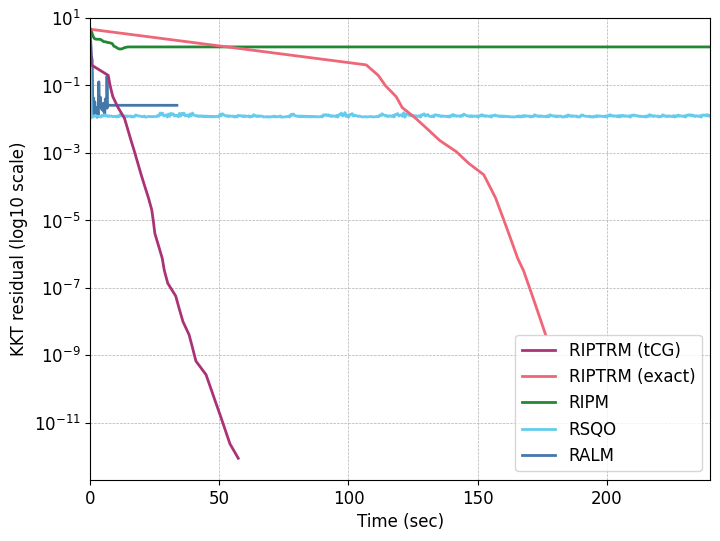

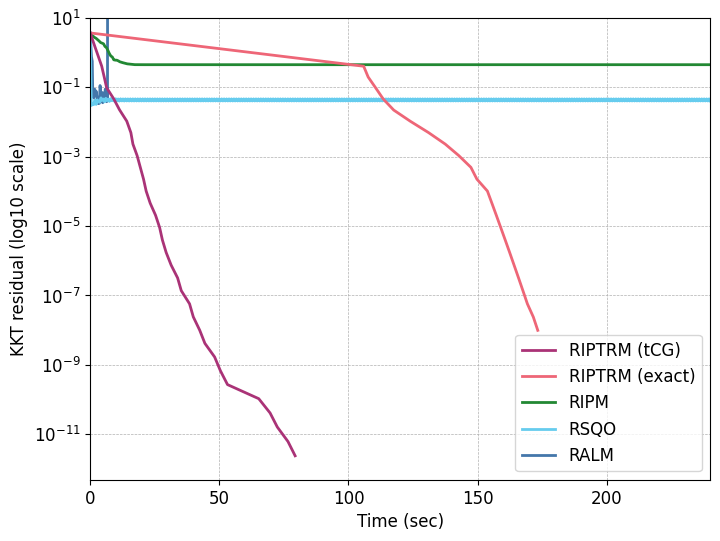

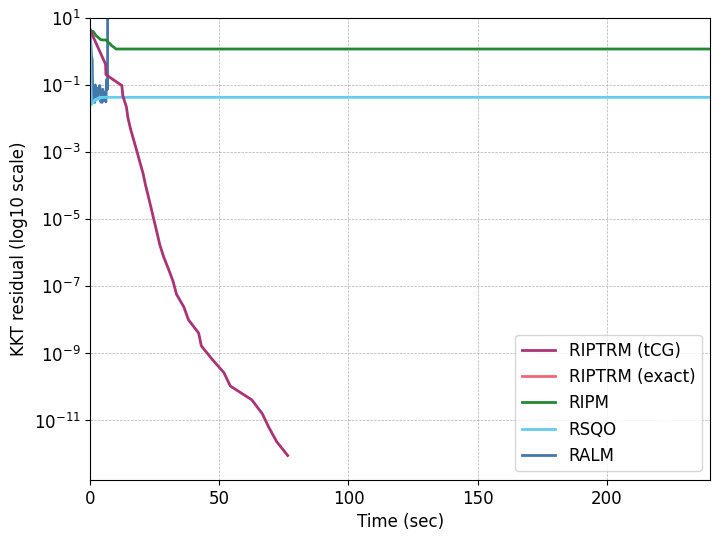

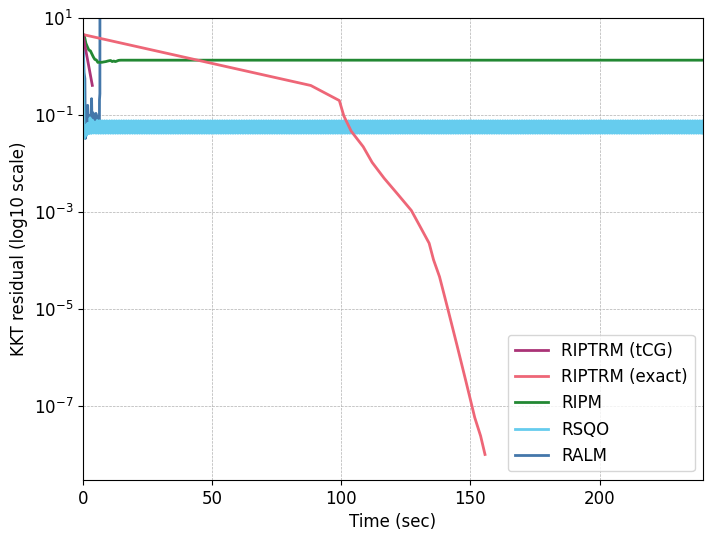

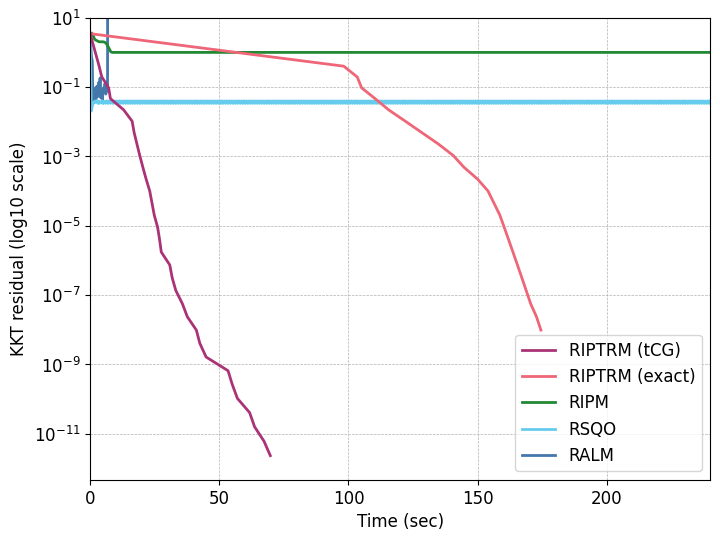

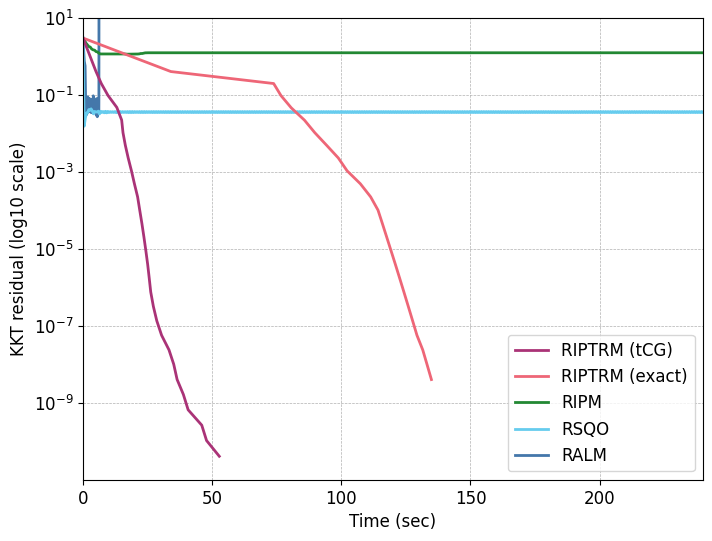

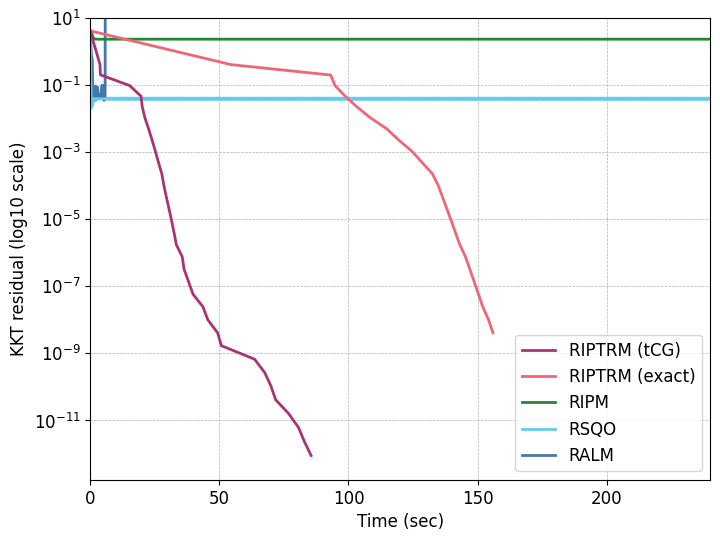

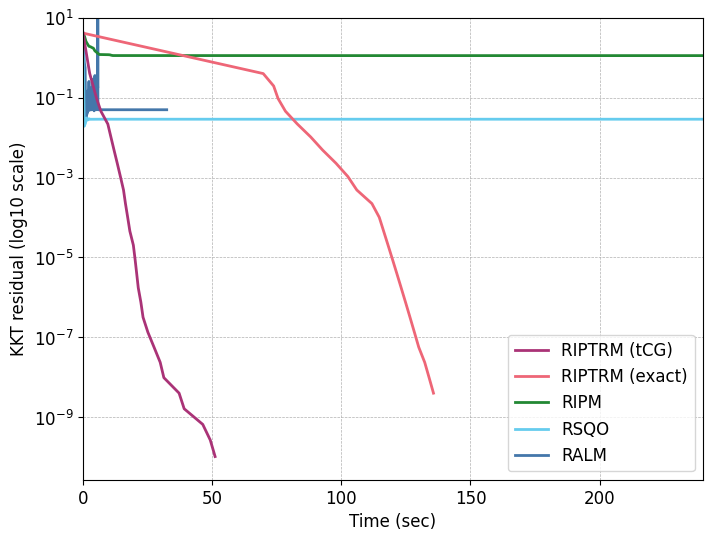

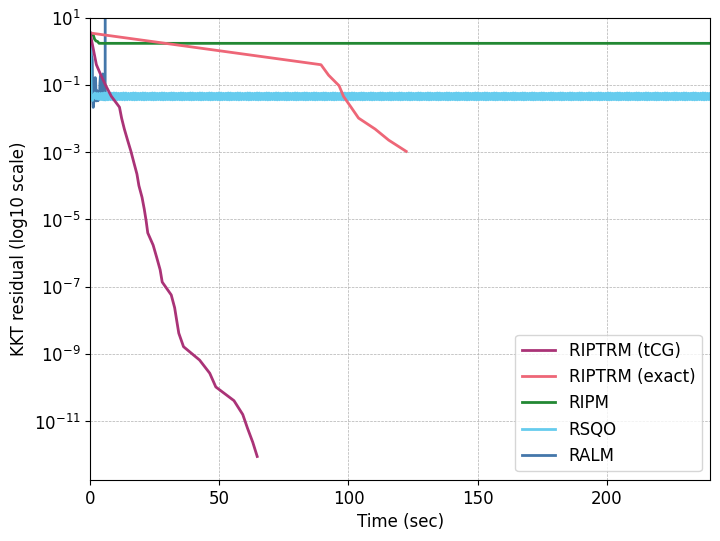

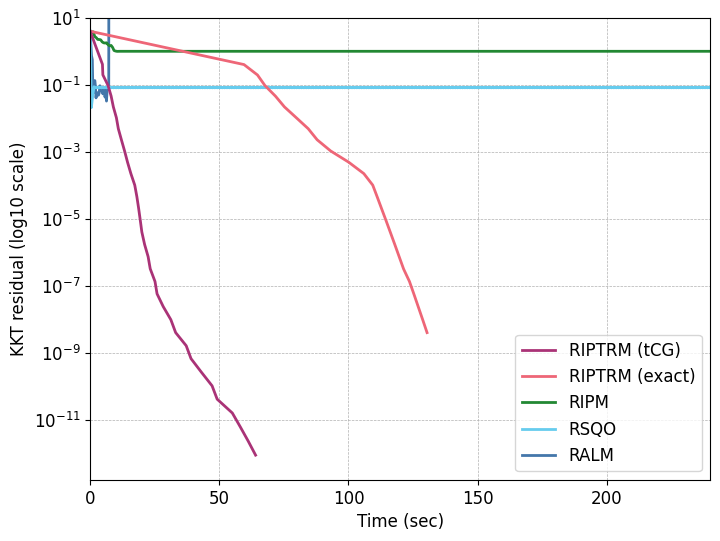

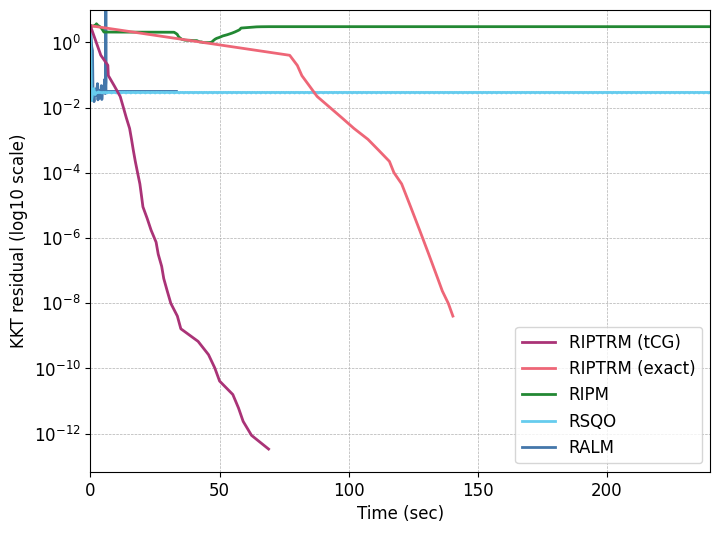

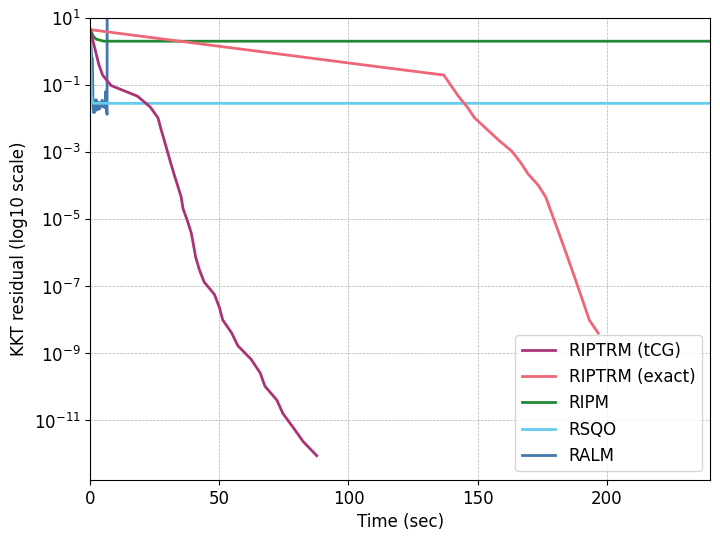

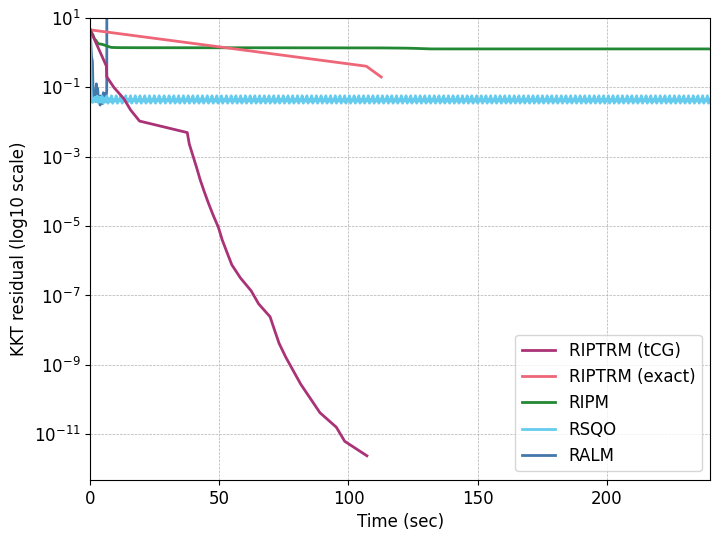

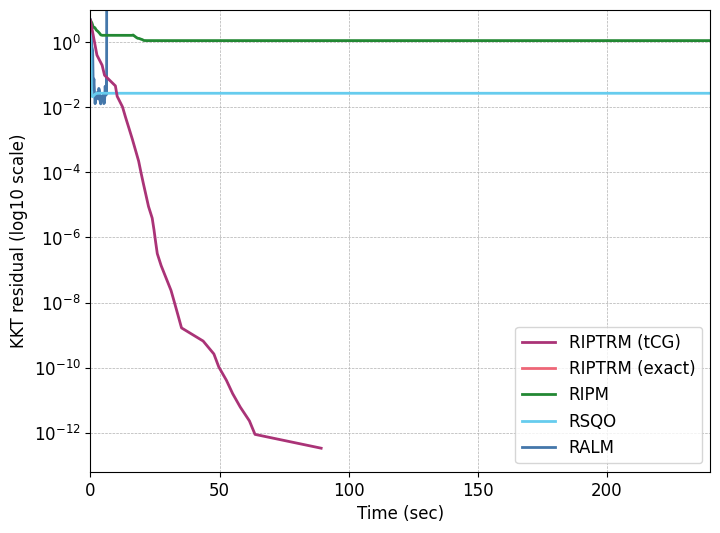

In [ ]:
# Graph plot

# Collect information from '{solver}_log.csv' with a specific instance and a fixed initial point
# problem_name = "StableIdentification"
problem_instance = 1
problem_initialpoint = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t"]
# solver_name = ["RIPTRM_tCG", "RIPTRM_Exact_RepMat", "RALM_SteepestDescent", "RIPM_RepMat", "RSQO_reghess"]
file_name = "log"

xaxis_col_name = "time"
yaxis_col_name = "residual"
is_y_logscale = True

# plot_graph(problem_name, problem_instance, problem_initialpoint, solver_name, file_name, yaxis_col_name, xaxis_col_name, is_ylogscale)

for initialpoint in problem_initialpoint:
  # Initial setting
  plt.figure(figsize=(8, 6))
  # plt.title(f"{xaxis_col_name} vs {yaxis_col_name} for {problem_name}-{problem_instance}-{initialpoint}")
  plt.ylabel(f"{yaxis_col_name}")

  # # Paul Tol's bright color-blind-friendly palette
  # tol_colors = ["#4477AA", "#66CCEE", "#228833", "#CCBB44", "#EE6677", "#AA3377", "#BBBBBB"]

  # Collect information
  load_path = f"{root_path}/intermediate/{problem_name}/{problem_instance}/{initialpoint}"
  for i, solver in enumerate(solver_name):
    # load the basic file
    log = pd.read_csv(f"{load_path}/{solver}_{file_name}.csv")

    # load the y-axis column
    if solver == "RIPTRM_tCG" or solver == "RIPTRM_Exact_RepMat":
      # converged_indices = log.index[log["inner_status"] == "converged"]
      # converged_indices = converged_indices + 1
      # converged_indices = converged_indices[converged_indices < len(log)]
      # indices = pd.Index([0]).union(converged_indices)  # 1行目はインデックス 0
      # log = log.loc[indices]
      # print(log)
      log = log[(log["inner_status"] == "converged") | (log["inner_status"].isna())]
      # log = log[(log["inner_status"] == "converged") | (log["inner_status"] == "successful") | (log["inner_status"].isna())]
      yloaded = log.loc[:,yaxis_col_name]
      yloaded = yloaded.to_frame()
      yloaded.columns = [solver]
    else:
      yloaded = log.loc[:,yaxis_col_name]
      yloaded = yloaded.to_frame()
      # print(yloaded)
      yloaded.columns = [solver]

    xloaded = log.loc[:,xaxis_col_name]
    xloaded = xloaded.to_frame()
    xloaded.columns = [solver]
    color = set_color(solver)
    display_name = set_display_name(solver)
    plt.plot(xloaded, yloaded, label=display_name, color=color, linestyle="-", linewidth=2)


  # # set x, y, display names
  # display_name = set_display_name(solver)
  xlabel = set_xlabel(xaxis_col_name)
  ylabel = set_ylabel(yaxis_col_name, is_y_logscale)
  plt.xlabel(xlabel, fontsize="large")
  plt.ylabel(ylabel, fontsize="large")
  plt.tick_params(axis="x", labelsize="large")
  plt.tick_params(axis="y", labelsize="large")

    # # load the y-axis column
    # yloaded = log.loc[:,yaxis_col_name]
    # yloaded = yloaded.to_frame()
    # yloaded.columns = [solver]

    # # set x, y, display names
    # display_name = set_display_name(solver)
    # xlabel = set_xlabel(xaxis_col_name)
    # ylabel = set_ylabel(yaxis_col_name, is_y_logscale)
    # plt.xlabel(xlabel)
    # plt.ylabel(ylabel)

    # # load the x-axis column
    # if xaxis_col_name is None:
    #     # plt.xlabel(f"step")
    #     # If not specified, then use the index as the x-axis
    #     plt.plot(yloaded, label=display_name, color=tol_colors[i % len(tol_colors)], linestyle="-", linewidth=2)
    # else:
    #     plt.xlabel(f"{xaxis_col_name}")
    #     xloaded = log.loc[:,xaxis_col_name]
    #     xloaded = xloaded.to_frame()
    #     xloaded.columns = [solver]
    #     plt.plot(xloaded, yloaded, label=display_name, color=tol_colors[i % len(tol_colors)], linestyle="-", linewidth=2)

  # Set the legend, grid, and y-axis scale
  # plt.legend(title="Solver", loc="upper right", fontsize="medium", title_fontsize="large")
  handles, labels = plt.gca().get_legend_handles_labels()
  plt.legend(handles[::-1], labels[::-1], loc="lower right",  title_fontsize="large", fontsize="large")
  # plt.legend(handles[::-1], labels[::-1])  # 順序を逆にしてlegendに渡す
  plt.grid(True, which="both", linestyle="--", linewidth=0.5)
  if is_y_logscale:
      plt.yscale("log")

  plt.gca().set_ylim(top=10)
  plt.gca().set_xlim(left=0, right=240)

  # Save the plot
  output_folder = f'{root_path}/result/{problem_name}/{problem_instance}/{initialpoint}'
  os.makedirs(f"{root_path}/result/{problem_name}", exist_ok=True)
  os.makedirs(f"{root_path}/result/{problem_name}/{problem_instance}", exist_ok=True)
  os.makedirs(output_folder, exist_ok=True)  # create {problem_name} folder under 'result' folder
  # plt.savefig(f"{output_folder}/{xaxis_col_name}_{yaxis_col_name}.pdf", bbox_inches="tight")
  plt.savefig(f"{output_folder}/{xaxis_col_name}_{yaxis_col_name}_outer.pdf", bbox_inches="tight")

            solver   residual
0     RIPTRM (tCG) -12.475348
0   RIPTRM (exact)  -0.397504
0             RIPM   0.050868
0             RSQO  -1.674315
0             RALM  -1.893742
..             ...        ...
0     RIPTRM (tCG) -12.317708
0   RIPTRM (exact)  -2.312801
0             RIPM   0.261180
0             RSQO  -1.847166
0             RALM  -1.513066

[100 rows x 2 columns]


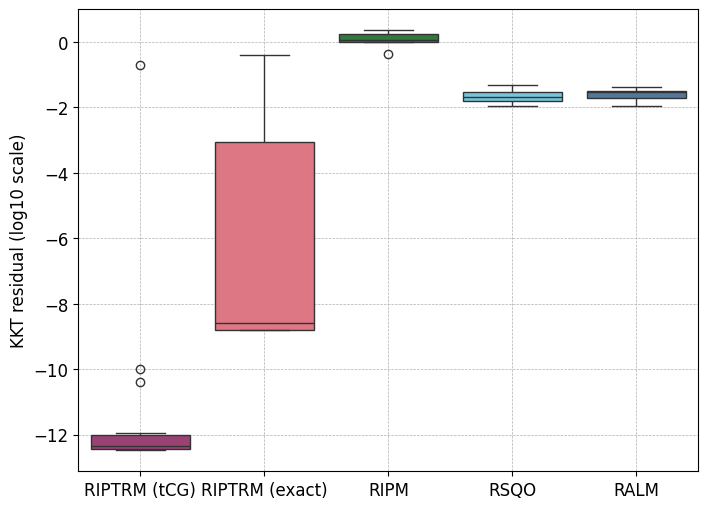

In [6]:
# Box plot
from matplotlib.ticker import LogFormatter

# Case 1: collect information of all instances with a fixed initial point
# problem_name = "StableIdentification"
problem_instance = [1]
problem_initialpoint = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t"]
# solver_name = ["RALM","RSQO"]
column_name = "residual"
file_name = "log"
is_y_logscale = True

# # Paul Tol's color-blind-friendly palette
# tol_colors = ["#4477AA", "#66CCEE", "#228833", "#CCBB44", "#EE6677", "#AA3377", "#BBBBBB"]



# Collect information
df = pd.DataFrame()
for instance in problem_instance:
  for initialpoint in problem_initialpoint:
    load_path = f"{root_path}/intermediate/{problem_name}/{instance}/{initialpoint}"
    data = {}
    for solver in solver_name:
      loaded = pd.read_csv(f"{load_path}/{solver}_{file_name}.csv")
      loaded = loaded[loaded["time"] <= 240]
      # print(loaded)
      value = loaded[column_name].min()
      # value = loaded.loc[loaded.index[-1], column_name]
      # value = loaded[column_name].min() / loaded.loc[0, column_name]
      if is_y_logscale:
        value = np.log10(value)
      display_name = set_display_name(solver)
      data["solver"] = display_name
      data[f"{column_name}"] = value
      instance_df = pd.DataFrame([data])
      df = pd.concat([instance_df, df])

print(df)
# plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(8, 6))
bb_tol_colors = ["#AA3377", "#EE6677","#228833","#66CCEE","#4477AA"]
sns.boxplot(x="solver", y=f"{column_name}", data=df, hue="solver", palette = bb_tol_colors, legend=False)

# plt.title(f"Box plot of {column_name} across {problem_name} instances")
plt.xlabel("")
# ylabel_name = f"{column_name} (log10 scale))" if is_y_logscale else column_name
# plt.ylabel(ylabel_name)
ylabel = set_ylabel(column_name, is_y_logscale)
plt.ylabel(ylabel, fontsize="large")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)


ax.tick_params(axis="x", labelsize="large")
ax.tick_params(axis="y", labelsize="large")

output_folder = f"{root_path}/result/{problem_name}"
os.makedirs(output_folder, exist_ok=True)  # create {problem_name} folder under 'result' folder
plt.savefig(f"{output_folder}/boxplot_{column_name}.pdf", bbox_inches="tight")
